In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [3]:
# データ
X = np.array([
    [-2.0, 1.0],
    [2.0, 1.0],
    [0.0, 1.5],
    [-2.0, -0.1],
    [2.0, 0.1],
])
B = -1 * np.ones(X.shape[0]).reshape(-1, 1)
X = np.hstack([B, X])
y = np.array([1, 1, 1, -1, -1])

In [4]:
# パーセプトロン学習アルゴリズム
def h(X, w):
    return np.sign(X @ w)

def get_indicator_set(hat_h_x, y):
    return np.where(hat_h_x != y)[0]
    
w = np.array([0.0, 1.0, 1.0]) # (w0, w1, w2)
hat_h0_x = h(X, w)
I = get_indicator_set(hat_h0_x, y)

w_history = [w]
yk_history = []
while I.size > 0:
    k = np.random.choice(I)
    w = w + y[k] * X[k]
    yk_history.append(y[k])
    h_hat_x = h(X, w)
    I = get_indicator_set(h_hat_x, y)
    w_history.append(w)
    
print('収束までにかかった回数', len(w_history) - 1)

収束までにかかった回数 8


0/1/2/3/4/5/6/7/

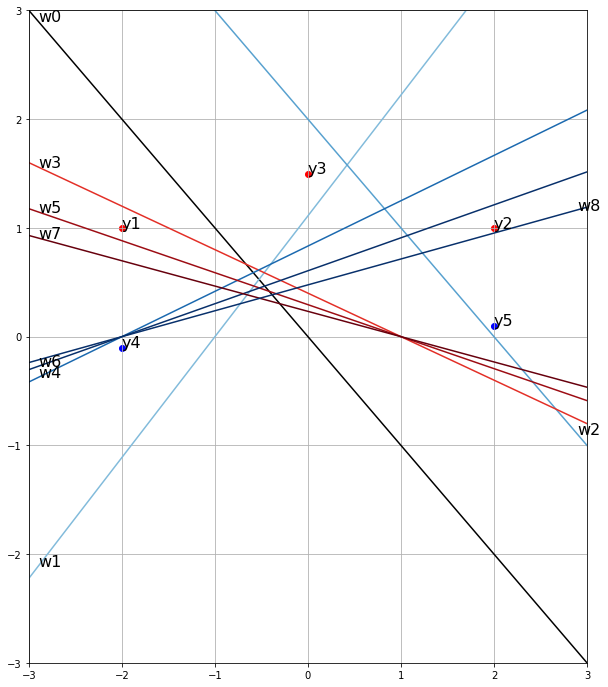

In [6]:
# 可視化
FS = 16
# w0 + w1*x1 + w2*x2 >= 0が正例
# w0 + w1*x1 + w2*x2 < 0が負例
# よって、w1*x1 + w2*x2 = -w0が識別境界
plt.figure(figsize=(10, 12))
x1_min, x1_max = (-3, 3)
x2_min, x2_max = (-3, 3)
        

def get_x2_point_from_x1(w, x1):
    '''
    (機能) x1が与えられた時に現在の識別境界上のx2の位置を返す関数
    (理由) 可視化の際に、毎回式を書くのは面倒だった。
    '''
    return (w[0] - w[1] * x1) / w[2]


def get_x1_point_from_x2(w, x2):
    '''
    (機能) x2が与えられた時に現在の識別境界上のx1の位置を返す関数
    (理由) 可視化の際に、毎回式を書くのは面倒だった。
    '''
    return (w[0] - w[2] * x2) / w[1]


annotate_history = np.array([])
def get_annotate_point(w):
    '''識別境界のラベルをannotateする座標を返す関数
    '''
    
    global annotate_history
    # x1, x2の候補を列挙し
    # (1) それぞれの点が、x1_minでx2が(-3, 3)の中に収まっているかを確かめる。
    # (2) すでに同じようなところに点が打ってあるならばずらして表示する。
    t = 0
    for x1, x2 in [
        [x1_min + 0.1, get_x2_point_from_x1(w, x1_min + 0.1)],
        [x1_max - 0.1, get_x2_point_from_x1(w, x1_max - 0.1)],
        [get_x1_point_from_x2(w, x2_min + 0.1), x2_min + 0.1],
        [get_x1_point_from_x2(w, x2_max - 0.1), x2_max - 0.1],
    ]:
        t += 1
        # (1)
        if (x1 < -3 or x1 > 3) or (x2 < -3 or x2 > 3):
            continue
        # (2)
        p = np.array([x1, x2])
        # 過去にannotateした座標に近い値があるかを判定
        if annotate_history.shape[0] > 0 and np.isclose(p, annotate_history, atol=0.1).all(axis=1).any():
            continue
            # あった場合は点をずらす
#             p[0] = p[0] + 0.1
        if len(annotate_history) > 0:
            annotate_history = np.vstack([annotate_history, p.reshape(1, -1)])
        else:
            annotate_history = p.reshape(1, -1)
        return p[0], p[1]
    raise Exception('見つからない')

    
def draw_line(w, color, label):
    # labelをつける座標を取る
    p = get_annotate_point(w)
    if w[0] != 0:
        plt.axline([0, w[0]/w[2]], [w[0]/w[1], 0], color=color)
    else:
        plt.axline([0, 0], p, color=color)
    # 線のlabelをつける
    plt.annotate(label, p, fontsize=FS)
        
plt.grid()
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

plt.scatter(X[y == 1, 1], X[y == 1, 2], color='red')
plt.scatter(X[y == -1, 1], X[y == -1, 2], color='blue')
for i in range(X.shape[0]):
    plt.annotate(f'y{i + 1}', (X[i, 1], X[i, 2]), fontsize=FS)

cmap_blue = plt.get_cmap("Blues")
cmap_red = plt.get_cmap("Reds")
N = len(w_history)

w0 = w_history[0]
draw_line(w0, 'black', 'w0')

for k in range(N - 1):
    w = w_history[k + 1]
    yk = yk_history[k]
    color = cmap_red((k + 4)/N) if yk > 0 else cmap_blue((k + 4)/N)
    print(k, end='/')
    draw_line(w, color, f'w{k + 1}')
plt.show()